# MNIST Digits (Classical)

This notebook trains and evaluates classical baselines for the MNIST Digits classification task.
You can find information about the dataset at https://www.tensorflow.org/datasets/catalog/mnist.

In [1]:
import jax
import tensorflow as tf
tf.config.set_visible_devices([], device_type='GPU')  # Ensure TF does not see GPU and grab all GPU memory.
tf.random.set_seed(42)  # For reproducibility.

from quantum_transformers.utils import plot_image
from quantum_transformers.datasets import get_mnist_dataloaders
from quantum_transformers.training import train_and_evaluate
from quantum_transformers.transformers import VisionTransformer

data_dir = '/global/cfs/cdirs/m4392/salcc/data'

2023-08-27 07:21:12.776222: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-08-27 07:21:12.776242: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-08-27 07:21:12.776257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-27 07:21:15.456175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


Please first ``pip install -U cirq`` to enable related functionality in translation module


The models are trained using the following devices:

In [2]:
for d in jax.devices():
    print(d, d.device_kind)

gpu:0 NVIDIA A100-SXM4-40GB


Let's check how many samples the dataset has, the shape of the input data, and how one sample looks like.

(28, 28, 1)


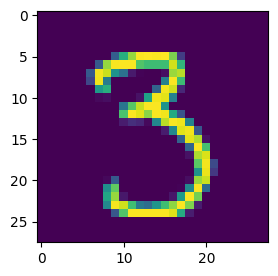

In [3]:
mnist_train_dataloader, mnist_val_dataloader, mnist_test_dataloader = get_mnist_dataloaders(batch_size=64, data_dir=data_dir)
first_image = next(iter(mnist_train_dataloader))[0][0]
print(first_image.shape)
plot_image(first_image)

Next, we train a big ViT that obtains a good AUC score on the test set (hyperparameters found by random hyperparameter search). Note however that this model size is too big to be replicated on a quantum computer currently.

In [4]:
model = VisionTransformer(num_classes=10, patch_size=14, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32)
train_and_evaluate(model, mnist_train_dataloader, mnist_val_dataloader, mnist_test_dataloader, num_classes=10, num_epochs=30)

Epoch  30/30: 100%|██████████| 843/843 [00:04<00:00, 210.29batch/s, Loss = 0.0701, AUC = 99.97%]


Total training time = 124.29s, best validation AUC = 99.98% at epoch 24


Testing: 100%|██████████| 156/156 [00:03<00:00, 46.57batch/s, Loss = 0.0693, AUC = 99.98%] 


Now let's train a smaller model which could be run on a quantum computer. Note that the number of parameters is much smaller.

In [5]:
model = VisionTransformer(num_classes=10, patch_size=14, hidden_size=8, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=4)
train_and_evaluate(model, mnist_train_dataloader, mnist_val_dataloader, mnist_test_dataloader, num_classes=10, num_epochs=30)

Epoch  30/30: 100%|██████████| 843/843 [00:03<00:00, 223.72batch/s, Loss = 0.2012, AUC = 99.67%]


Total training time = 120.23s, best validation AUC = 99.67% at epoch 30


Testing: 100%|██████████| 156/156 [00:02<00:00, 60.34batch/s, Loss = 0.1953, AUC = 99.71%]  
